# Classification with Logistic regression

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_blobs

In [2]:
X, y = make_blobs(n_samples=100, centers= np.array([[-1],[1]]), n_features=1, shuffle=True, random_state=2017)

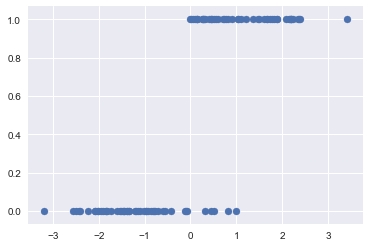

In [3]:
plt.scatter(X,y)

## Using sklearn

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
xgrid = np.linspace(-3.5,3.5, 1000)
Xgrid = xgrid.reshape(-1,1)
Y = y.reshape(-1,1)

In [6]:
logr = LogisticRegression(C=10000)
logr.fit(X,y)
yp2 = logr.predict(Xgrid)

//anaconda/envs/py3l/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


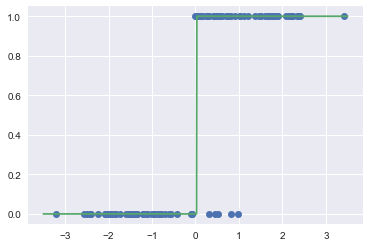

In [7]:
plt.plot(X,y,'o')
plt.plot(xgrid, yp2)

In [8]:
logr.predict_proba(Xgrid)

array([[9.99991656e-01, 8.34395170e-06],
       [9.99991460e-01, 8.54008992e-06],
       [9.99991259e-01, 8.74083864e-06],
       ...,
       [1.04266602e-05, 9.99989573e-01],
       [1.01871940e-05, 9.99989813e-01],
       [9.95322753e-06, 9.99990047e-01]])

In [9]:
probs = logr.predict_proba(Xgrid)[:,1]

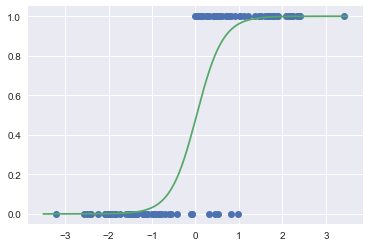

In [10]:
plt.plot(X,y,'o')
plt.plot(xgrid, probs)

In [30]:
logr.coef_, logr.intercept_

(array([[3.31593843]]), array([-0.08818078]))

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y, logr.predict(X))

0.93

In [38]:
ypred = 1*(logr.predict_proba(X)[:,1] >= 0.5)
accuracy_score(y, ypred)

0.93

## Using pytorch and sigmoids

In [11]:
import torch

In [12]:
# from https://www.stefanfiott.com/machine-learning/tensors-and-gradients-in-pytorch/
def tensor_properties(t, show_value=True):
    print('Tensor properties:')
    props = [('rank', t.dim()),
             ('shape', t.size()),
             ('data type', t.dtype),
             ('tensor type', t.type())]
    for s,v in props:
        print('\t{0:12}: {1}'.format(s,v))
    if show_value:
        #print('{0:12}: {1}'.format('value',t))
        print("Value:")
        print(t)

In [22]:
X_data = torch.from_numpy(X).float()
Y_data = torch.from_numpy(Y).float()
y_data = torch.from_numpy(y).float()

In [23]:
tensor_properties(Y_data)

Tensor properties:
	rank        : 2
	shape       : torch.Size([100, 1])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
     

In [24]:
class Model0(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model0, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and two out
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        linears = self.linear(x)
        probs = self.sigmoid(linears)
        return probs

In [25]:
model = Model0()

In [26]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the 
# nn.Linear modules which are members of the model.
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Training loop
accum = []
for epoch in range(10000):
    
    # Forward pass: Compute predicted y by passing x to the modela
    
    optimizer.zero_grad()
    
    prob_pred = model.forward(X_data)

    # Compute and print loss
    loss = criterion(prob_pred, y_data)
    accum.append(loss.item())
    #print(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    
    loss.backward()
    optimizer.step()

//anaconda/envs/py3l/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


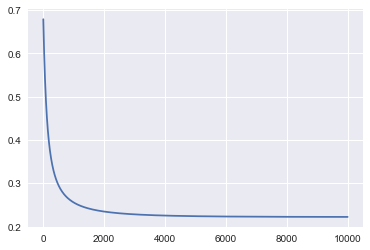

In [27]:
plt.plot(accum)

In [28]:
list(model.named_parameters())

[('linear.weight', Parameter containing:
  tensor([[2.4066]], requires_grad=True)),
 ('linear.bias', Parameter containing:
  tensor([0.0057], requires_grad=True))]

In [31]:
Xgrid_data = torch.from_numpy(Xgrid).float()
probs_sigmoid = model.forward(Xgrid_data)

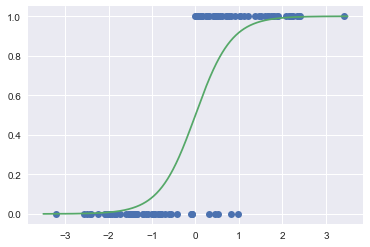

In [35]:
plt.plot(X,y,'o')
plt.plot(xgrid, probs_sigmoid.detach().numpy())

In [41]:
probs_sigmoid_X = model.forward(X_data)

In [42]:
ypred = 1*(probs_sigmoid_X.detach().numpy().flatten() >= 0.5)
accuracy_score(y, ypred)

0.95

## Using pytorch and softmax

In [43]:
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 2)  # One in and two out
        self.lsm = torch.nn.LogSoftmax()

    def forward(self, x):
        linears = self.linear(x)
        logprobs = self.lsm(linears)
        return logprobs

In [44]:
model = Model()

In [46]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the 
# nn.Linear modules which are members of the model.
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Training loop
accum = []
for epoch in range(10000):
    
    # Forward pass: Compute predicted y by passing x to the modela
    
    optimizer.zero_grad()
    
    prob_pred = model.forward(X_data)

    # Compute and print loss
    loss = criterion(prob_pred, y_data.long())
    accum.append(loss.item())
    #print(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    
    loss.backward()
    optimizer.step()

//anaconda/envs/py3l/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


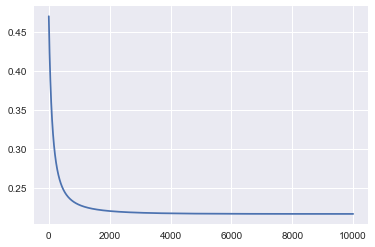

In [47]:
plt.plot(accum)

In [48]:
list(model.named_parameters())

[('linear.weight', Parameter containing:
  tensor([[-1.4811],
          [ 1.2287]], requires_grad=True)),
 ('linear.bias', Parameter containing:
  tensor([-0.0860, -0.1038], requires_grad=True))]

In [49]:
# After training
logprobs_smax = model.forward(Xgrid_data)
logprobs_smax.shape

//anaconda/envs/py3l/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


torch.Size([1000, 2])

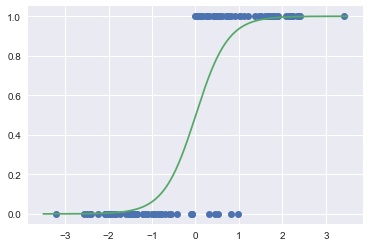

In [50]:
plt.plot(X,y,'o')
plt.plot(xgrid, np.exp(logprobs_smax.detach().numpy()[:,1]))

In [52]:
logprobs_smax_X = model.forward(X_data)
ypred = 1*(np.exp(logprobs_smax_X.detach().numpy()[:,1]) >= 0.5)
accuracy_score(y, ypred)

//anaconda/envs/py3l/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0.94